In [20]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
from rdkit.Chem import rdMolDescriptors

In [21]:
suffixes = ["held_out", "test", "train", "validation"]


base_path= "/mimer/NOBACKUP/groups/naiss2023-6-290/erngard/REINVENT4_MasterThesis/dataset/tack"
dataframes = []
for suffix in suffixes:
    try:
        csv_file = f"{base_path}_{suffix}.smi"
        dataframes.append(pd.read_csv(csv_file, header=None, names=["SMILES"]))
    except Exception as e:
        print(e)
        continue


df = pd.DataFrame()
df = pd.concat(dataframes, ignore_index=True)


df = pd.read_csv("/mimer/NOBACKUP/groups/naiss2023-6-290/erngard/REINVENT4_MasterThesis/dataset/synthetic_held_out.smi", header=None, names=["SMILES"])

#count = df.count("PROTACDB ID")
display(df)
print(df.columns)
#counts = df.groupby(["E3 Ligase", "Target"]).count().sort_values("PROTACDB ID", ascending=False)
#display(counts)


[Errno 2] No such file or directory: '/mimer/NOBACKUP/groups/naiss2023-6-290/erngard/REINVENT4_MasterThesis/dataset/tack_held_out.smi'
[Errno 2] No such file or directory: '/mimer/NOBACKUP/groups/naiss2023-6-290/erngard/REINVENT4_MasterThesis/dataset/tack_test.smi'


,SMILES
0,CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCC...
1,CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCC...
2,CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCC...
3,CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCC...
4,CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCC...
...,...
1764,CC(C)C(C(=O)NC(C)(C)C)N(Cc1cc(F)c(F)c(F)c1)C(=...
1765,Cc1nnc2n1-c1sc(C#Cc3ccn(CCCCNc4cccc5c4CN(C4CCC...
1766,CC(=NNc1nc(-c2ccc(-c3ccccc3)cc2)cs1)C(=O)NCCCN...
1767,CC(=NNc1nc(-c2ccc(-c3ccccc3)cc2)cs1)C(=O)NCCCC...


Index(['SMILES'], dtype='object')


In [24]:
smiles_list = df["SMILES"]

def smiles_metric_eval(smiles, function):
    mol = Chem.MolFromSmiles(smiles)
    return function(mol)

desc_fns = {
    "Length"             : len,
    "MolWt"              : lambda smi: smiles_metric_eval(smi, Descriptors.MolWt),
    "LogP"               : lambda smi: smiles_metric_eval(smi, Descriptors.MolLogP),
    "TPSA"               : lambda smi: smiles_metric_eval(smi, Descriptors.TPSA),
    "HBA"                : lambda smi: smiles_metric_eval(smi, Descriptors.NumHAcceptors),
    "HBD"                : lambda smi: smiles_metric_eval(smi, Descriptors.NumHDonors),
    "RotBonds"           : lambda smi: smiles_metric_eval(smi, Descriptors.NumRotatableBonds),
    "NumCycles"          : lambda smi: smiles_metric_eval(smi, Descriptors.RingCount),
    "StereoCenters"      : lambda smi: smiles_metric_eval(
        smi,
        lambda mol: rdMolDescriptors.CalcNumAtomStereoCenters(mol) + rdMolDescriptors.CalcNumUnspecifiedAtomStereoCenters(mol)
    ),
    
    
}

smiles_props = pd.DataFrame(columns=list(desc_fns.keys()))

print(smiles_props)

for i, smi in enumerate(smiles_list):
    row = []
    #mol = Chem.MolFromSmiles(smi)
    #row.append(len(smi))
    for name, desc in desc_fns.items():
        #if name == "StereoCenters":
        #    assigned = rdMolDescriptors.CalcNumAtomStereoCenters(mol)
        #    unspecified = rdMolDescriptors.CalcNumUnspecifiedAtomStereoCenters(mol)
        #    row.append(assigned+unspecified)
        #if name != "Length":
        #    row.append(desc(mol))
        row.append(desc(smi))
    smiles_props.loc[i] = row


#for col in smiles_props.columns:


Empty DataFrame
Columns: [Length, MolWt, LogP, TPSA, HBA, HBD, RotBonds, NumCycles, StereoCenters]
Index: []


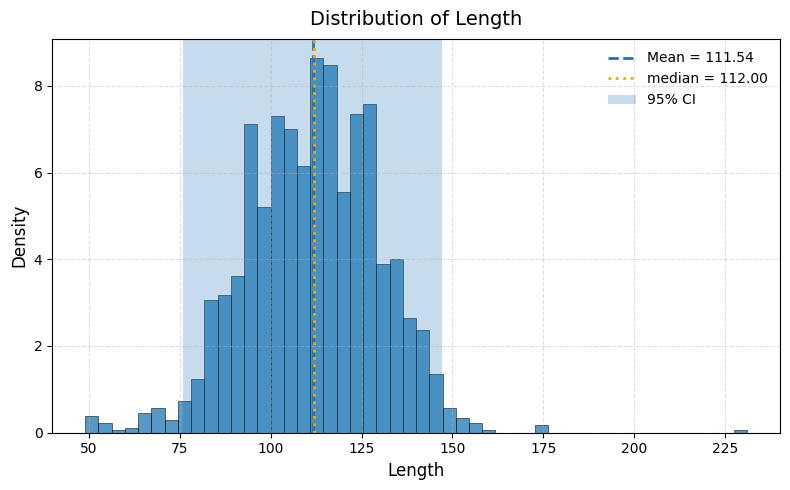

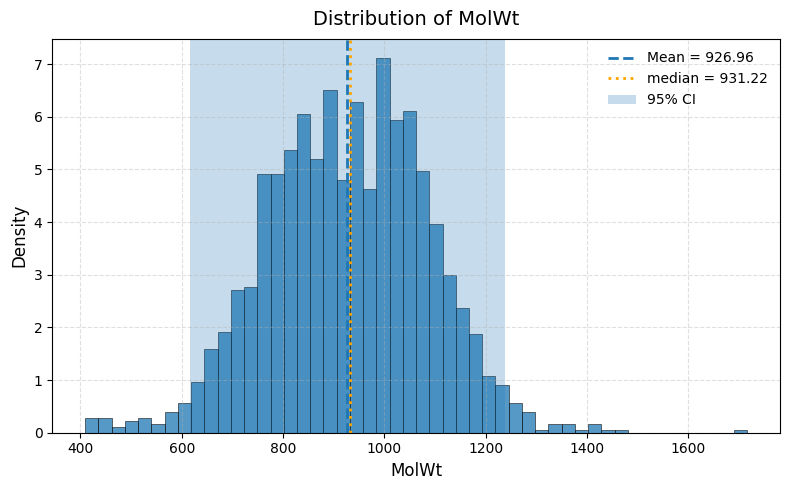

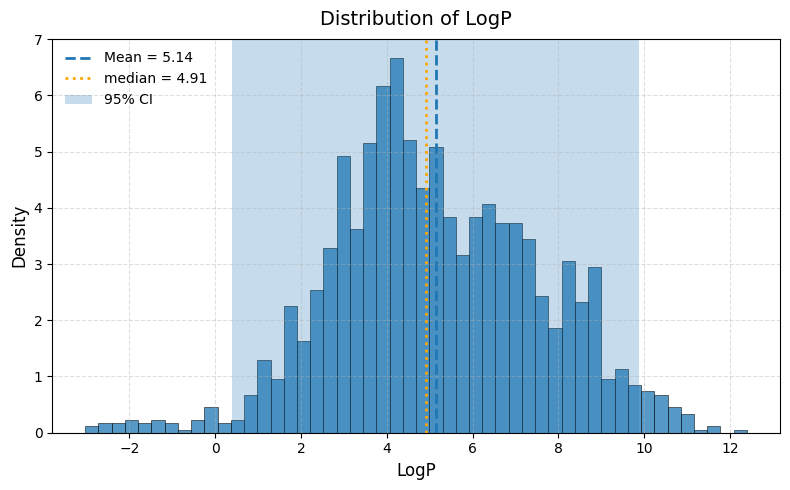

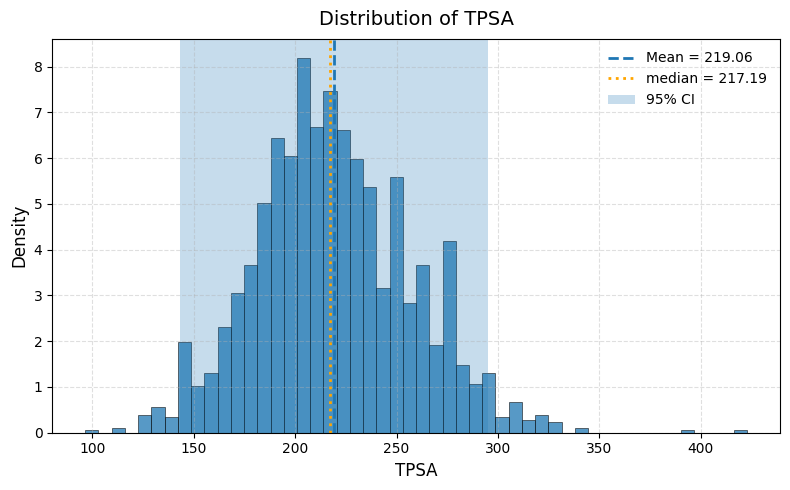

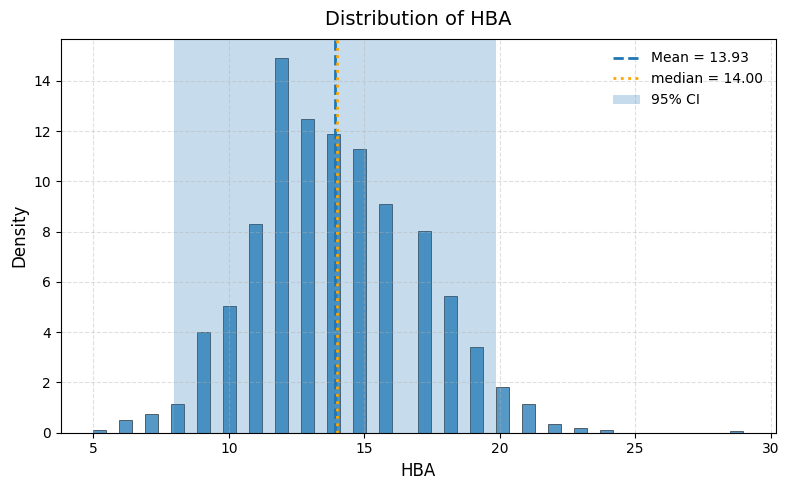

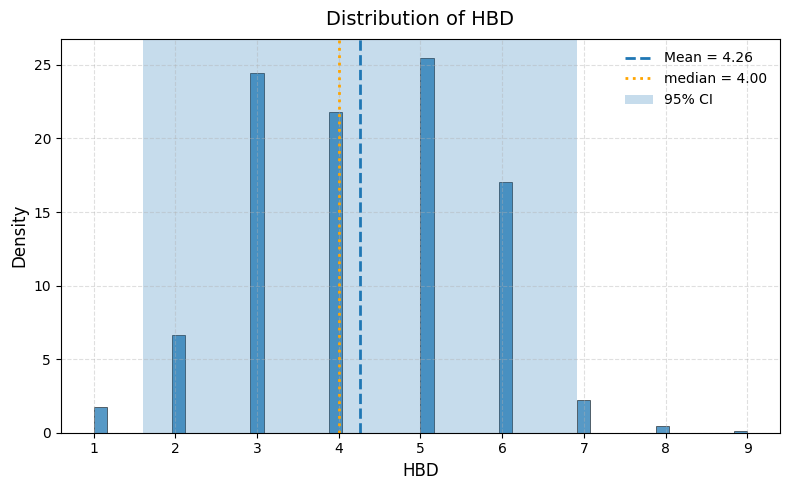

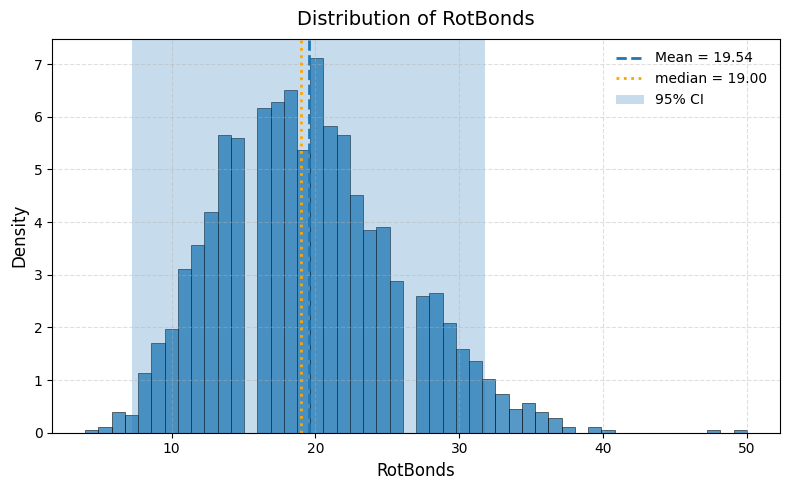

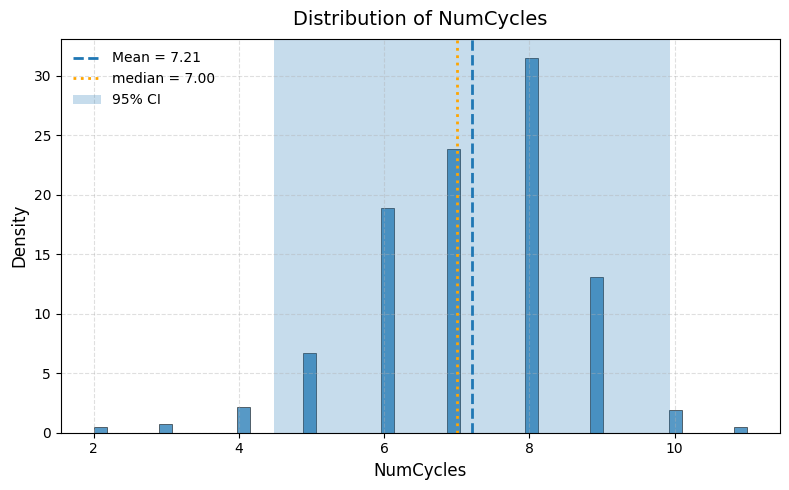

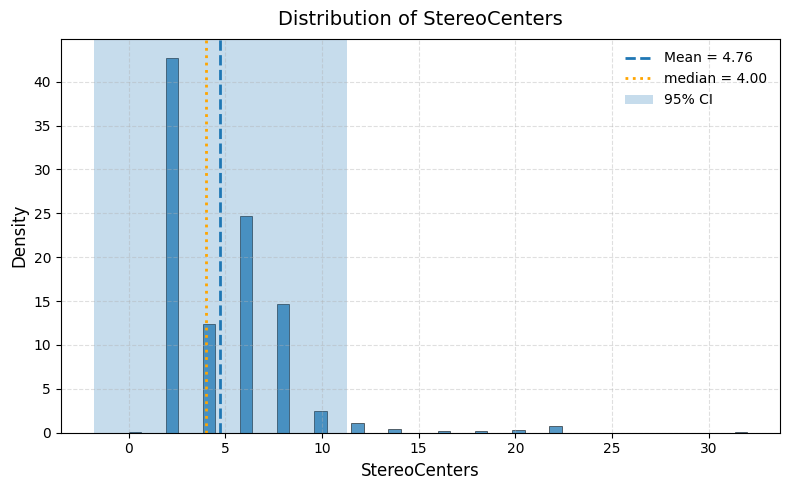

,max,min,mean,median,std,Lower bound,Upper bound
Length,231.00000,49.0000,111.535896,112.00000,18.220246,75.824214,147.247578
MolWt,1715.31100,409.3980,926.956603,931.22500,159.044006,615.230351,1238.682854
LogP,12.39552,-3.0282,5.140623,4.91468,2.423051,0.391443,9.889802
TPSA,422.77000,96.4300,219.064545,217.19000,38.662017,143.286992,294.842097
HBA,29.00000,5.0000,13.927643,14.00000,3.029525,7.989774,19.865511
HBD,9.00000,1.0000,4.256642,4.00000,1.356125,1.598637,6.914647
RotBonds,50.00000,4.0000,19.541549,19.00000,6.262959,7.266149,31.816949
NumCycles,11.00000,2.0000,7.213680,7.00000,1.391886,4.485583,9.941777
StereoCenters,32.00000,0.0000,4.756360,4.00000,3.347856,-1.805438,11.318157


In [25]:
import matplotlib.pyplot as plt
import numpy as np

stats_df = smiles_props.agg(['max', 'min', 'mean', 'median', 'std']).T

for col in smiles_props.columns:
    data = smiles_props[col].dropna()

    mean = stats_df.loc[col, 'mean']
    std = stats_df.loc[col, 'std']
    median = stats_df.loc[col, 'median']

    sigma = 1.96

    lb = mean - sigma * std
    ub = mean + sigma * std

    stats_df.loc[col, "Lower bound"] = lb
    stats_df.loc[col, "Upper bound"] = ub

    plt.figure(figsize=(8, 5))
    percentage = np.ones_like(data) * 100 / len(data)

    plt.hist(
        data,
        bins=50,
        weights=percentage,
        alpha=0.75,
        edgecolor='black',
        linewidth=0.5
    )

    plt.axvline(
        mean,
        linestyle='--',
        linewidth=2,
        label=f"Mean = {mean:.2f}"
    )

    plt.axvline(
        median,
        linestyle='dotted',
        linewidth=2,
        label=f"median = {median:.2f}",
        color = "orange"
    )

    plt.axvspan(
        lb,
        ub,
        alpha=0.25,
        label="95% CI"
    )

    plt.title(f"Distribution of {col}", fontsize=14, pad=10)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(frameon=False)

    plt.tight_layout()

    plt.show()

display(stats_df)


In [2]:
from reinvent.chemistry.standardization.rdkit_standardizer import (
    RDKitStandardizer,
)

SMILES = "Clc1ccc(O[C@H]2CC[C@@H](CC2)NC(=O)CCSc2nc3ccccc3c(=O)[nH]2)cc1"

standardizer = RDKitStandardizer(None, isomeric=False)
standard_smiles = standardizer.apply_filter(SMILES)

print(SMILES)
print(standard_smiles)


Clc1ccc(O[C@H]2CC[C@@H](CC2)NC(=O)CCSc2nc3ccccc3c(=O)[nH]2)cc1
O=C(CCSc1nc2ccccc2c(=O)[nH]1)NC1CCC(Oc2ccc(Cl)cc2)CC1


In [52]:
GEN_SMILES = "COc1cc2nccc(Sc3ccc(C(=O)NC4CC4)cn3)c2cc1NS(=O)(=O)c1cc(NS(=O)(=O)c2cccc(-c3nnnn3C)c2)ccc1OC"

tmp = "CC(NC(=O)C(=O)NC(=O)CN(Cc1ccccc1)C(=O)NC(=O)C(=O)NC(=O)C(Cc1c[nH]cn1)NC(=O)C(=O)NC(=O)C(C)NC(=O)C(=O)NC(=O)C(=O)N1CCC1C(N)=O)C(=O)O"

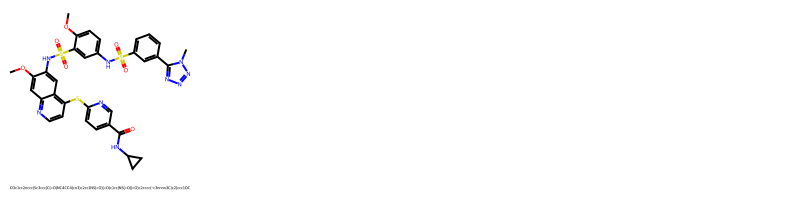

In [53]:
from rdkit.Chem import Draw
from rdkit import Chem
smiles_list = [GEN_SMILES]
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]
img_grid = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200,200), legends=smiles_list)
img_grid

In [54]:
test_smiles = "COc1cc2nccc(Sc3ccc(C(=O)NC4CC4)cn3)c2cc1NS(=O)(=O)c1cc(NS(=O)(=O)c2cccc(-c3nnnn3C)c2)ccc1OC"

smiles_list = pd.DataFrame([test_smiles], columns=["SMILES"])

print(smiles_list)

def smiles_metric_eval(smiles, function):
    mol = Chem.MolFromSmiles(smiles)
    return function(mol)

desc_fns = {
    "Length"             : len,
    "MolWt"              : lambda smi: smiles_metric_eval(smi, Descriptors.MolWt),
    "LogP"               : lambda smi: smiles_metric_eval(smi, Descriptors.MolLogP),
    "TPSA"               : lambda smi: smiles_metric_eval(smi, Descriptors.TPSA),
    "HBA"                : lambda smi: smiles_metric_eval(smi, Descriptors.NumHAcceptors),
    "HBD"                : lambda smi: smiles_metric_eval(smi, Descriptors.NumHDonors),
    "RotBonds"           : lambda smi: smiles_metric_eval(smi, Descriptors.NumRotatableBonds),
    "NumCycles"          : lambda smi: smiles_metric_eval(smi, Descriptors.RingCount),
    "StereoCenters"      : lambda smi: smiles_metric_eval(
        smi,
        lambda mol: rdMolDescriptors.CalcNumAtomStereoCenters(mol) + rdMolDescriptors.CalcNumUnspecifiedAtomStereoCenters(mol)
    ),
    
    
}

smiles_props = pd.DataFrame(columns=list(desc_fns.keys()))

print(smiles_props)

smiles_list = smiles_list["SMILES"]

for i, smi in enumerate(smiles_list):
    row = []
    #mol = Chem.MolFromSmiles(smi)
    #row.append(len(smi))
    for name, desc in desc_fns.items():
        #if name == "StereoCenters":
        #    assigned = rdMolDescriptors.CalcNumAtomStereoCenters(mol)
        #    unspecified = rdMolDescriptors.CalcNumUnspecifiedAtomStereoCenters(mol)
        #    row.append(assigned+unspecified)
        #if name != "Length":
        #    row.append(desc(mol))
        row.append(desc(smi))
    smiles_props.loc[i] = row

print(smiles_props)



                                              SMILES
0  COc1cc2nccc(Sc3ccc(C(=O)NC4CC4)cn3)c2cc1NS(=O)...
Empty DataFrame
Columns: [Length, MolWt, LogP, TPSA, HBA, HBD, RotBonds, NumCycles, StereoCenters]
Index: []
   Length    MolWt    LogP    TPSA   HBA  HBD  RotBonds  NumCycles  \
0    91.0  773.879  4.4825  209.28  14.0  3.0      13.0        7.0   

   StereoCenters  
0            0.0  


In [55]:
comp_stats = stats_df.copy()

for col in smiles_props.columns:
    comp_stats.loc[col, "Comp"] = smiles_props[col][0]

display(comp_stats)

,max,min,mean,median,std,Lower bound,Upper bound,Comp
Length,231.00000,49.0000,111.535896,112.00000,18.220246,75.824214,147.247578,91.0000
MolWt,1715.31100,409.3980,926.956603,931.22500,159.044006,615.230351,1238.682854,773.8790
LogP,12.39552,-3.0282,5.140623,4.91468,2.423051,0.391443,9.889802,4.4825
TPSA,422.77000,96.4300,219.064545,217.19000,38.662017,143.286992,294.842097,209.2800
HBA,29.00000,5.0000,13.927643,14.00000,3.029525,7.989774,19.865511,14.0000
HBD,9.00000,1.0000,4.256642,4.00000,1.356125,1.598637,6.914647,3.0000
RotBonds,50.00000,4.0000,19.541549,19.00000,6.262959,7.266149,31.816949,13.0000
NumCycles,11.00000,2.0000,7.213680,7.00000,1.391886,4.485583,9.941777,7.0000
StereoCenters,32.00000,0.0000,4.756360,4.00000,3.347856,-1.805438,11.318157,0.0000
